# 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats

#set default setting of seaborn
sns.set()

# 2. Read the data

In [2]:
raw_data = pd.read_csv(r'C:\Users\Tarun\Desktop\DS\Machine Learning\Supervised Learning\Python\Naive Bayes\mobile_price.csv')
raw_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data = raw_data.copy(deep = True)
#data - is duplicate data #raw_data - is original data

#Make a copy of this object’s indices and data.
#When deep=True (default), a new object will be created with a copy of the calling object’s data and
#indices. Modifications to the data or indices of the copy will not be reflected in the original object
#When deep=False, a new object will be created without copying the calling object’s data or index
#(only references to the data and index are copied). Any changes to the data of the original will be
#reflected in the shallow copy (and vice versa)

# 3.1 Data types and Dimensions

In [4]:
data.shape #get shape

(2000, 21)

In [5]:
data.info() #get data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### As we can see from above o/p there are no catogorical data.

# 3.2 Data manipulation

In [6]:
data['n_cores'] = data['n_cores'].astype('object')
data['price_range'] = data['price_range'].astype('object')

In [7]:
data.info() #get data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   object 
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Data has been changed to object

# 3.3 Missing Data Treatment

In [8]:
# to get missing count
missing_values = data.isnull().sum()
missing_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### There are no missing data in the table

# 3.4 Statistical summary

In [9]:
# data frame with numerical features

data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


#### The above o/p illustrates the summary of all numeric variables like mean,median(50%),quartiles, min max values along with std

In [10]:
#data frame with catagorical features

data.describe(include = 'object')

,n_cores,price_range
count,2000,2000
unique,8,4
top,4,0
freq,274,500


#### The above o/p illustrates the summary of all catagorical variables like count,unique,top,freq

# 4.EDA

# 4.1 Univariate Analysis
### Exploring individual features

## 4.1.1. Distribution of battery power

In [11]:
data.battery_power.describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='battery_power', ylabel='Density'>

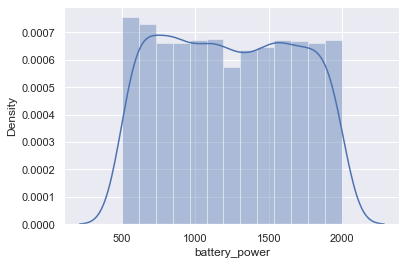

In [12]:
sns.distplot(data.battery_power)

The above histogram shows that :
  * Battery power attribute is almost sy,,etric in nature
  *  Min and max power is 500 and 2000
  *  The data set has fewer observations at the extreme values that is mas and min values
  * This indicates that people mainly 

## 4.1.2 blue count

In [13]:
data.blue.value_counts()

0    1010
1     990
Name: blue, dtype: int64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


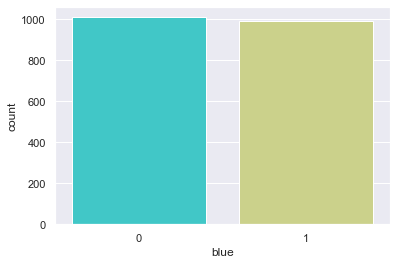

In [14]:
sns.countplot(data.blue,data=data,palette = 'rainbow')
plt.show()

### This Countplot of "Blue" shows that:

## 4.1.3 clock_speed

In [15]:
data.clock_speed.describe()

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

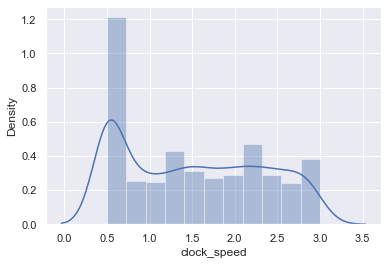

In [16]:
sns.distplot(data.clock_speed)

### The above histogram shows that :

## 4.1.4 Dual SIM

In [17]:
data.dual_sim.value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


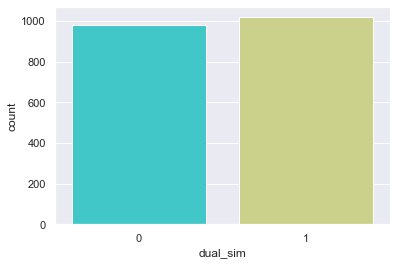

In [18]:
sns.countplot(data.dual_sim,data=data,palette = 'rainbow')
plt.show()

### This Countplot of "Dual SIM" shows that:

## 4.1.5 Front camera feature

In [19]:
data.fc.describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fc', ylabel='Density'>

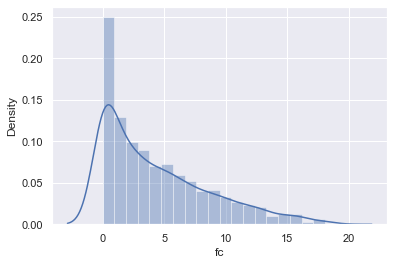

In [20]:
sns.distplot(data.fc)

In [21]:
data.fc[data.fc == 0].count()

474

### The above histogram shows that :

Lets check skew

In [22]:
data.fc.skew()

1.0198114105315519

## 4.1.6 four_g

In [23]:
data.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


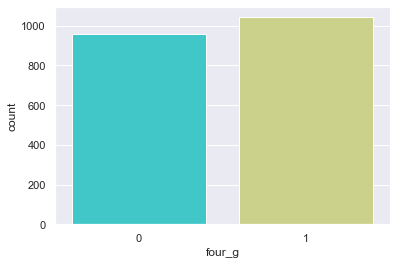

In [24]:
sns.countplot(data.four_g,data=data,palette = 'rainbow')
plt.show()

## 4.1.7 int_memory

In [25]:
data.int_memory.describe()

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_memory', ylabel='Density'>

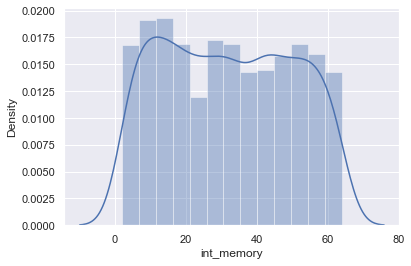

In [26]:
sns.distplot(data.int_memory)

## 4.1.8 m_dep

In [27]:
data.m_dep.describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='m_dep', ylabel='Density'>

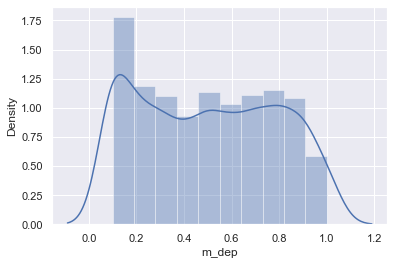

In [28]:
sns.distplot(data.m_dep)

## 4.1.9 mobile_wt

In [29]:
data.mobile_wt.describe()

count    2000.000000
mean      140.249000
std        35.399655
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: mobile_wt, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

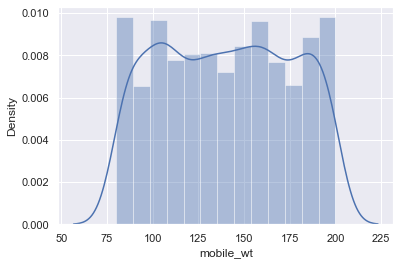

In [30]:
sns.distplot(data.mobile_wt)

## 4.1.10 n_cores

In [31]:
    data.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


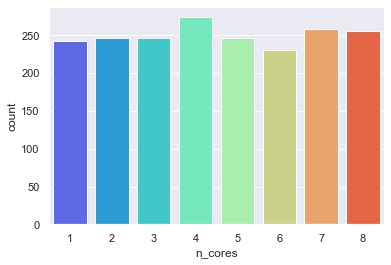

In [32]:
sns.countplot(data.n_cores,data=data,palette = 'rainbow')
plt.show()

## 4.1.11 pc

In [33]:
data.pc.describe()

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pc', ylabel='Density'>

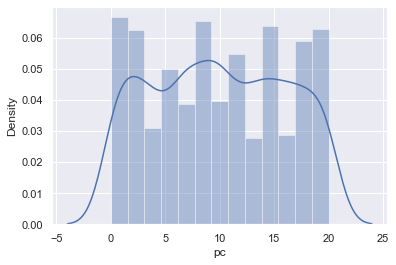

In [34]:
sns.distplot(data.pc)

## 4.1.12 px_height

In [35]:
data.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='px_height', ylabel='Density'>

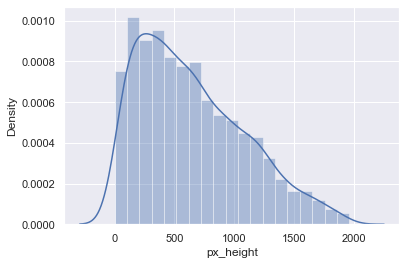

In [36]:
sns.distplot(data.px_height)

In [37]:
data.px_height.skew()

0.6662712560691598

## 4.1.13 px_width

count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='px_width', ylabel='Density'>

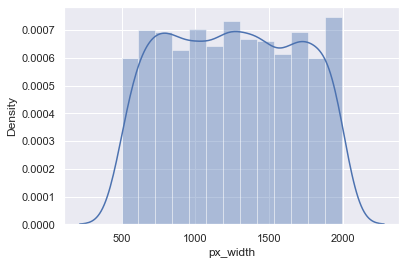

In [38]:
print(data.px_width.describe())
sns.distplot(data.px_width)

## 4.1.14 ram

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ram', ylabel='Density'>

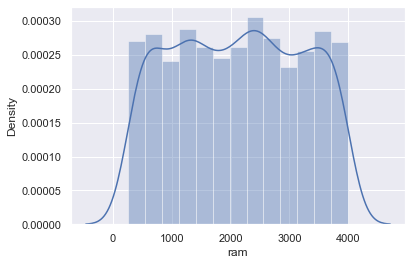

In [39]:
print(data.ram.describe())
sns.distplot(data.ram)

## 4.1.15 sc_h

count    2000.000000
mean       12.306500
std         4.213245
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_h, dtype: float64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sc_h', ylabel='Density'>

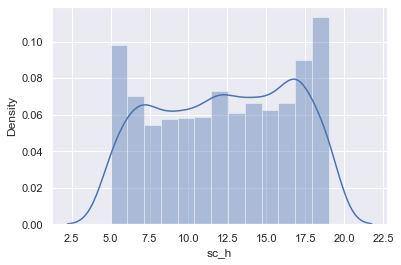

In [40]:
print(data.sc_h.describe())
sns.distplot(data.sc_h)

## 4.1.16 sc_w

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sc_w', ylabel='Density'>

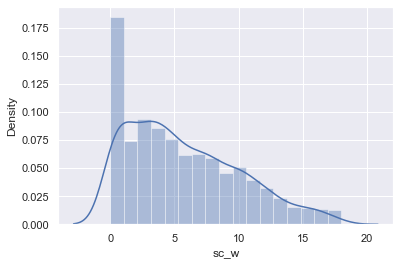

In [41]:
print(data.sc_w.describe())
sns.distplot(data.sc_w)

## 4.1.17 talk_time

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='talk_time', ylabel='Density'>

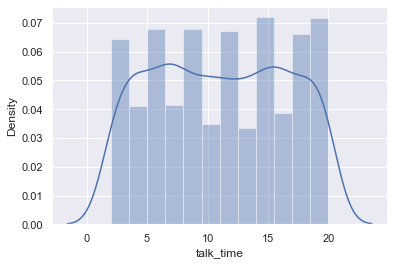

In [42]:
print(data.talk_time.describe())
sns.distplot(data.talk_time)

## 4.1.18 three_g

1    1523
0     477
Name: three_g, dtype: int64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


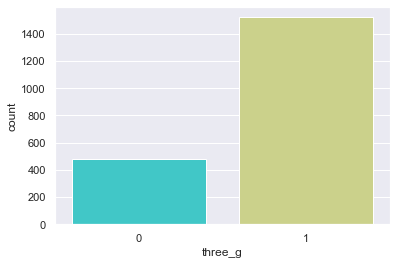

In [43]:
print(data.three_g.value_counts())
sns.countplot(data.three_g,data=data,palette = 'rainbow')
plt.show()

## 4.1.19 touch_screen

1    1006
0     994
Name: touch_screen, dtype: int64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


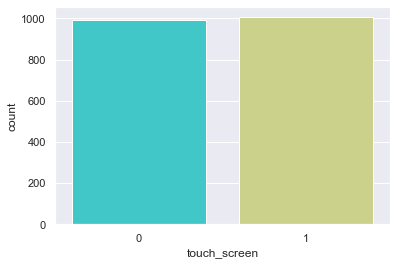

In [44]:
print(data.touch_screen.value_counts())
sns.countplot(data.touch_screen,data=data,palette = 'rainbow')
plt.show()

## 4.1.20 wifi

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    1014
0     986
Name: wifi, dtype: int64


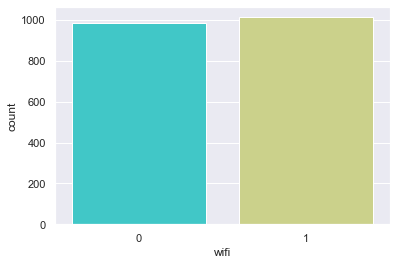

In [45]:
print(data.wifi.value_counts())
sns.countplot(data.wifi,data=data,palette = 'rainbow')
plt.show()

In [46]:
## 4.1.21 price_range

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64


C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


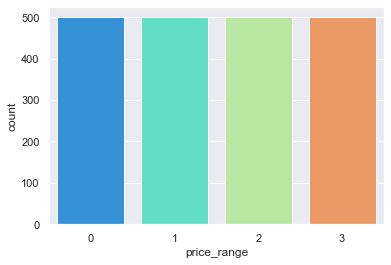

In [47]:
print(data.price_range.value_counts())
sns.countplot(data.price_range,data=data,palette = 'rainbow')
plt.show()

# 4.2 Bivariate Analysis

## 4.2.1 Batter power

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

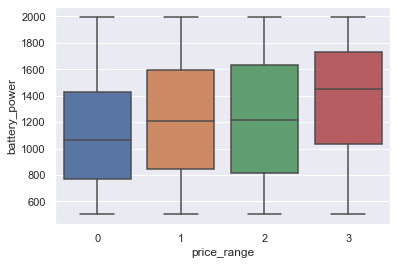

In [48]:
sns.boxplot(y = data.battery_power , x = data.price_range)

## 4.2.2 blue

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

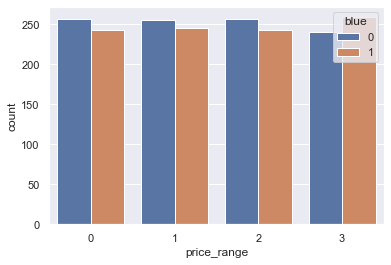

In [49]:
sns.countplot(data.price_range,hue=data.blue)

## 4.2.3 clock_speed

<AxesSubplot:xlabel='price_range', ylabel='clock_speed'>

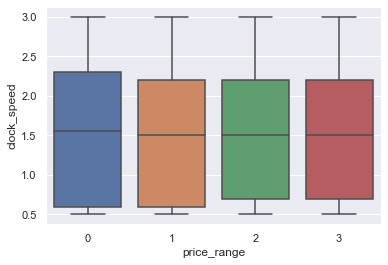

In [50]:
sns.boxplot(y = data.clock_speed , x = data.price_range)

## 4.2.4 dual_sim

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

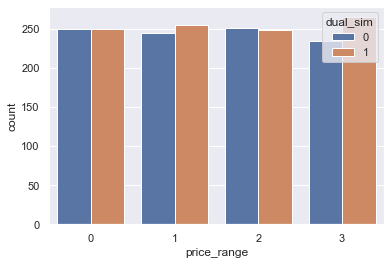

In [51]:
sns.countplot(data.price_range,hue=data.dual_sim)

## 4.2.5 fc

<AxesSubplot:xlabel='price_range', ylabel='fc'>

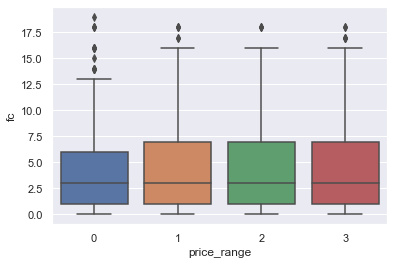

In [52]:
sns.boxplot(y = data.fc , x = data.price_range)

## 4.2.6 four_g

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

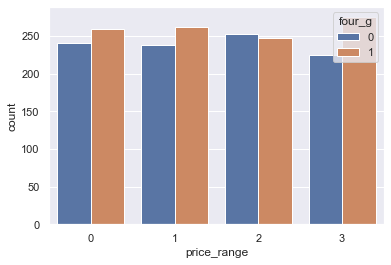

In [53]:
sns.countplot(data.price_range,hue=data.four_g)

## 4.2.7 int_memory

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

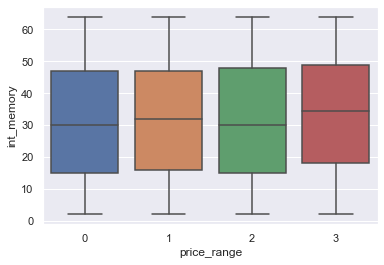

In [54]:
sns.boxplot(y = data.int_memory , x = data.price_range)

## 4.2.8 m_dep

<AxesSubplot:xlabel='price_range', ylabel='m_dep'>

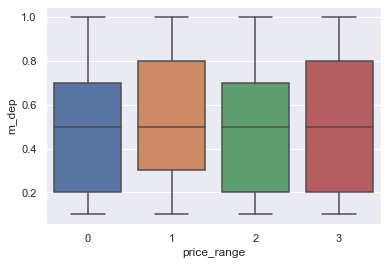

In [55]:
sns.boxplot(y = data.m_dep , x = data.price_range)

## 4.2.9 mobile_wt

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

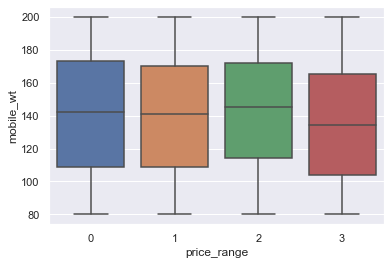

In [56]:
sns.boxplot(y = data.mobile_wt , x = data.price_range)

## 4.2.10 n_cores

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

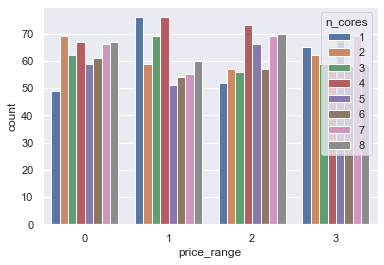

In [57]:
sns.countplot(data.price_range,hue=data.n_cores)

## 4.2.11 pc

<AxesSubplot:xlabel='price_range', ylabel='pc'>

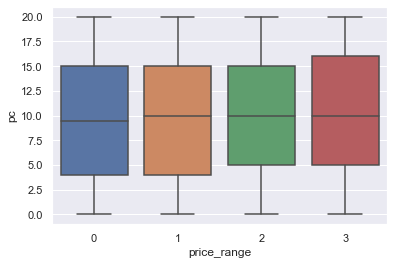

In [58]:
sns.boxplot(y = data.pc , x = data.price_range)

## 4.2.12 px_height

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

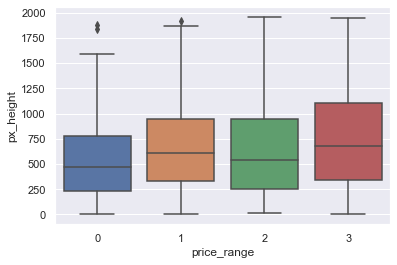

In [59]:
sns.boxplot(y = data.px_height , x = data.price_range)

## 4.2.13 px_width

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

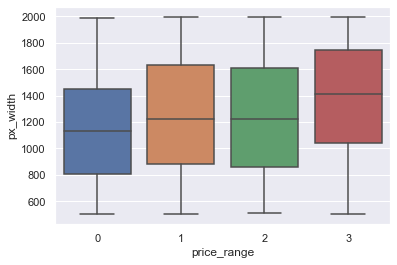

In [60]:
sns.boxplot(y = data.px_width , x = data.price_range)

## 4.2.14 ram

<AxesSubplot:xlabel='price_range', ylabel='ram'>

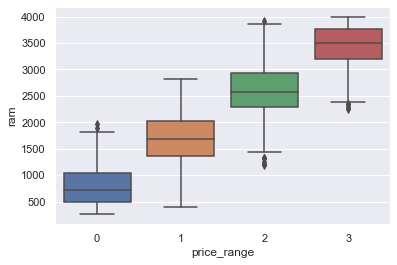

In [61]:
sns.boxplot(y = data.ram , x = data.price_range)

## 4.2.15 sc_h

<AxesSubplot:xlabel='price_range', ylabel='sc_h'>

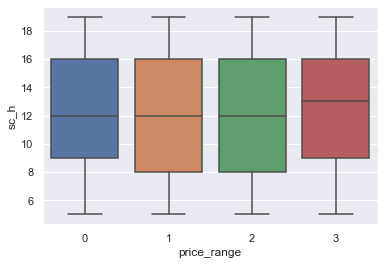

In [62]:
sns.boxplot(y = data.sc_h , x = data.price_range)

## 4.2.16 sc_w

<AxesSubplot:xlabel='price_range', ylabel='sc_w'>

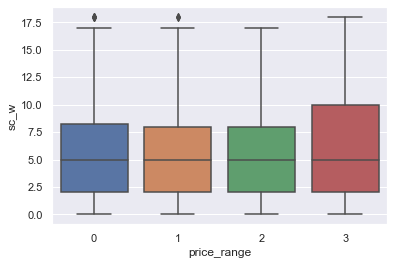

In [63]:
sns.boxplot(y = data.sc_w , x = data.price_range)

## 4.2.17 talk_time

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

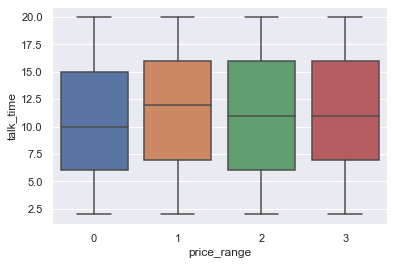

In [64]:
sns.boxplot(y = data.talk_time , x = data.price_range)

## 4.2.18 three_g

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

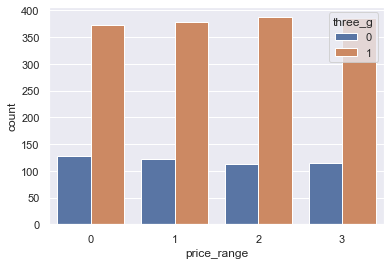

In [65]:
sns.countplot(data.price_range,hue=data.three_g)

## 4.2.19 touch_screen

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

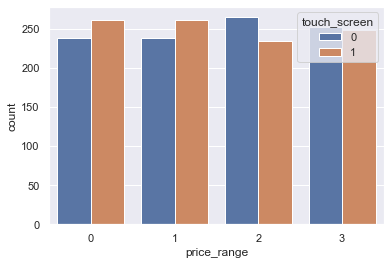

In [66]:
sns.countplot(data.price_range,hue=data.touch_screen)

## 4.2.20 wifi

C:\Users\Tarun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

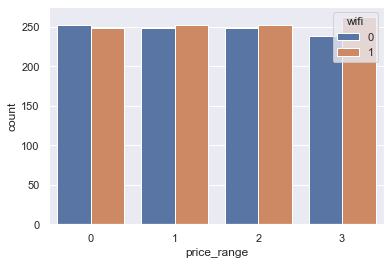

In [67]:
sns.countplot(data.price_range,hue=data.wifi)

# 4.3 Multivariate

## 4.3.1 Correlation among features

In [68]:
data_num = data.copy(deep = True)
data_num.price_range = data.price_range.astype("int64")
data_num.n_cores = data.n_cores.astype("int64")
corr = data_num.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

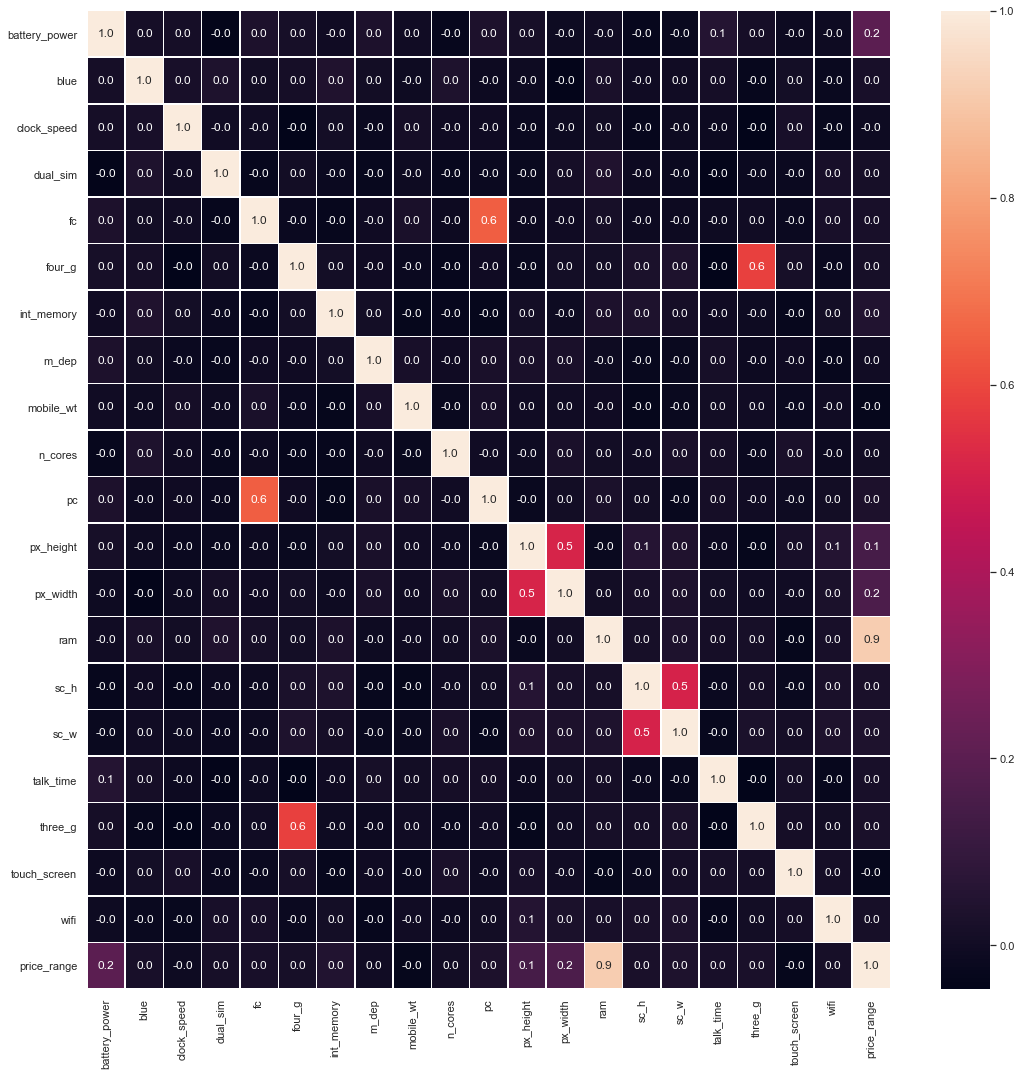

In [69]:
fig,ax = plt.subplots(figsize = (18,18))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt='.1f',ax=ax)

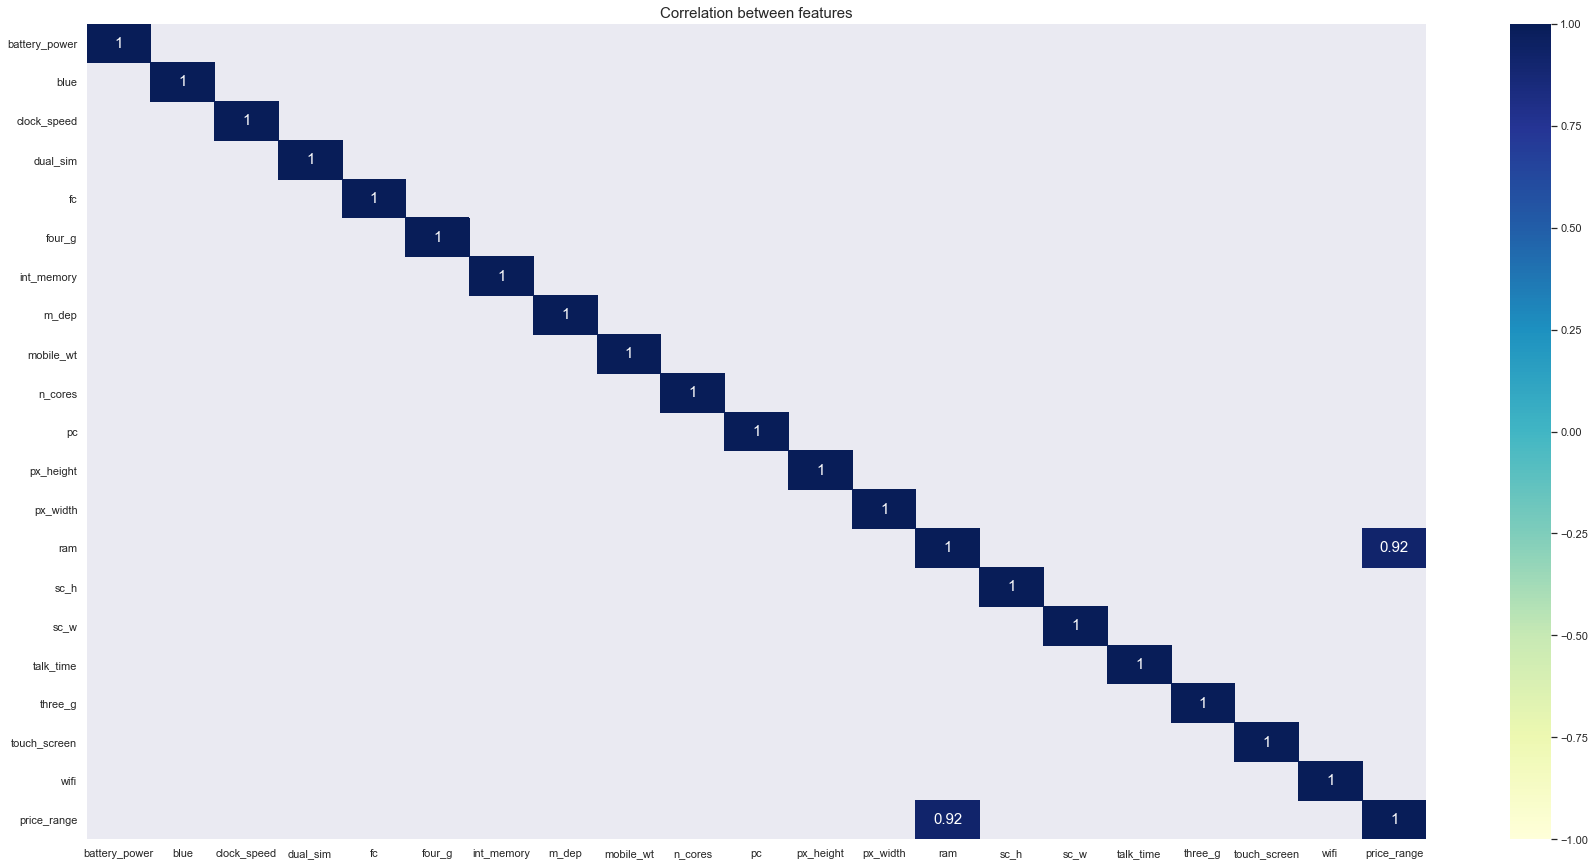

In [70]:
plt.figure(figsize = (30,15))
sns.heatmap(corr[(corr>=0.9) | (corr <=-0.9)],
           cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0,
           annot=True, annot_kws={"size":15})
plt.title('Correlation between features',fontsize=15)
plt.show()

# 4.4 Conclusion of EDA

#### Feature Removal :
    
pc(Primary camera mega pixels) and fc(front camera mega pixels) are highly correlated

#### Outliers

* fc
* px_height
* ram
* sc_w

# 5. Label Encoding for categorical variable

In [71]:
data_with_dummies = pd.get_dummies(data.drop(['price_range'],axis=1),drop_first = True)
data_with_dummies['price_range']=data.price_range
data_with_dummies.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,...,touch_screen,wifi,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,0,1,1,0,0,0,0,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,6,...,1,0,0,1,0,0,0,0,0,2
2,563,1,0.5,1,2,1,41,0.9,145,6,...,1,0,0,0,0,1,0,0,0,2
3,615,1,2.5,0,0,0,10,0.8,131,9,...,0,0,0,0,0,0,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,14,...,1,0,1,0,0,0,0,0,0,1


# 6. Feature selection

In [72]:
#split data into 60% training - 40% test

x = data_with_dummies.drop(['price_range'],axis=1)
y = data_with_dummies['price_range'].astype('int64')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#create a randon forest classifier

clf=RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)

# Train the classifier
clf.fit(x_train,y_train)

#n_estimators:int, default=100
#The number of trees in the forest
#n_jobs:int, default=None
#The number of jobs to run in parallel. None means 1.-1 means using all processors

In [ ]:
feature_labels = x.columns.values
#print the name and gini importance of all features
feature_importance = []
for feature in zip(feature_labels,clf.feature_importances_):
    feature_importance.append(feature)

In [ ]:
feature_importance

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(clf, threshold=0.01)

In [ ]:
sfm.fit(x_train,y_train)

In [ ]:
selected_features = []
#print the names of most important features
for feature_list_index in sfm.get_support(indices = True):
    selected_features.append(feature_labels[feature_list_index])

In [ ]:
selected_features

In [ ]:
data_selected = data_with_dummies[selected_features]
data_selected.head()

# 7. Standardise data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(data_selected)
data_standardised = scalar.fit_transform(data_selected)

### split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

x=data_standardised
y=data_with_dummies['price_range'].astype('int64')
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)


# 8.Model building
#### 1.Build

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
#build the model
gnb = GaussianNB()

#define the ovr strategy
GNB = OneVsRestClassifier(gnb)

#one_vs_the_rest (ovr) multiclass stategy
#this is the most commonly used strategy for multiclass classification

#fit the model
GNB.fit(x_train, y_train)

#### 2.Prediction

In [ ]:
y_pred_GNB = GNB.predict(x_test)

#### 3.Compute accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
#compute the confusion matrix
cm = confusion_matrix(y_test,y_pred_GNB)

#label the confusion matrix
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],
                          index=['Actual:0','Actual:1','Actual:2','Actual:3'])
#set size of the plot
plt.figure(figsize=(8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a color bar
# fmt: string formatting code to use when adding annotations

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='YlGnBu',cbar=False)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
#accuracy measures by classification_report()

result = classification_report(y_test,y_pred_GNB)

print(result)

#### 4.Tabulate the results

In [ ]:
from sklearn import metrics

cols = ['Model','Precision Score','Recall Score','Accuracy Score','f1-score']

result_tabulation = pd.DataFrame(columns=cols)

Naive_bayes = pd.Series({"Model":"Naive bayes",
                        'Precision Score': metrics.precision_score(y_test,y_pred_GNB,average="macro"),
                        'Recall Score': metrics.recall_score(y_test,y_pred_GNB,average="macro"),
                        'Accuracy Score': metrics.accuracy_score(y_test,y_pred_GNB),
                        'f1-score': metrics.f1_score(y_test,y_pred_GNB,average="macro")})

result_tabulation = result_tabulation.append(Naive_bayes , ignore_index=True)

In [ ]:
result_tabulation

## As we can see in the above table the accuracy for the model is 79.66%